# 4、调用alpha101、alpha191、技术因子、candleresearch或者自己创造衍生因子，要求：任意两个因子，进行画图观察，主要例子看alpha101research和candleresearch，写研究报告（画了什么因子，思考了什么现象，对现象进行描述）


https://github.com/ChannelCMT/formula/wiki

数据类型和周期自定


# 5、观察两个因子，和价格图有什么联系，如果是蜡烛图，和成交量有什么联系，怎么找到相应的信号，提出自己信号进出场的假设。（分别完成两个因子的信号假设）

信号进出场假设：可以借鉴MastatiscResearch，但不要将思路假设局限在均线上，可以观察大盘上的其他现象来写信号假设，也可以进行同时满足多个因子的信号来设计信号假设等等。

此处需要说出联系、找到的信号、你的信号进出场假设是什么

# 6、将你的其中一个假设落实，如果能完成两个更好，但不强求

利用TimingSignal最后输出long、short、long_short这三个绩效表出来


# 技术因子RSI

In [2]:
#观察技术因子RSI（较上一个星期，进出场信号有所修改）
import warnings
warnings.filterwarnings('ignore')

from jaqs_fxdayu.data.dataservice import LocalDataService
ds = LocalDataService()
from time import time
## 加freq参数

start = time()
path = r'./min_data/VnTrader_1Min_Db'
props = {'fields': 'open,high,low,close,volume',
         'symbol': 'BTCUSDT:binance' ,
         'freq': '1H',
         'start_date':20180601000000}

Time_dict = ds.bar_reader(path,props) #读取数据
print(time()-start)

4.467571020126343


In [3]:
from jaqs_fxdayu.data.hf_dataview import HFDataView
dv1H = HFDataView()

In [4]:
dv1H.create_init_dv(Time_dict.set_index(["trade_date","symbol"]))

Initialize dataview success.


In [5]:
import matplotlib.pyplot as plt
import pandas as pd

def Plot_Mean(dv, RSI_J, chart_name='dv_RSI', n=0):
    fig,(ax,ax1) = plt.subplots(2,1,sharex=True, figsize=(15,15))
    ax.plot(dv.get_ts('close', date_type='datetime').iloc[:,0].iloc[n:])
    ax.set_title(chart_name,fontsize=24,color='b') 
    ax1.plot(RSI_J.iloc[n:], alpha=1)
        
    # plt.savefig(chart_name)
    plt.show()


In [6]:
dv1H.add_formula('Ui', """If(close>Delay(close, 1),close-Delay(close, 1),If(close<Delay(close, 1), 0, 0))""", add_data=True)
dv1H.add_formula('Di',"""If(close>Delay(close, 1),0,If(close<Delay(close, 1), Delay(close, 1)-close, 0))""", add_data=True)
RSI = dv1H.add_formula('RSI_J',
                         "100-100/(1+(Ta('MA',0,Ui,Ui,Ui,Ui,Ui,12)/Ta('MA',0,Di,Di,Di,Di,Di,12)))" ,
                          add_data=True)

较上一星期，重新修改了自己的进出场信号
进场信号： 
long:如果出现，当6日RSI向上穿过12日RSI & 前一个小时的6日RSI向下穿过12日RSI & RSI的值小于30 的信号时，赋值2表示做多，下多单。
short:如果出现，当6日RSI向下穿过12日RSI & 前一个小时的6日RSI向上穿过12日RSI & RSI的值大于70 的信号时，赋值-2表示做空，下空单。
出场信号： 
close_long：判断当前市场是否出现新的信号可以开空单，那么就平掉原来的多仓，否则继续持有多仓。赋值为1，表示平多仓。
close_short：判断当前市场是否出现新的信号可以开多单，那么就平掉原来的空仓，否则继续持有空仓。赋值为-1，表示平空仓。

In [28]:
# 进场信号
long = dv1H.add_formula("long","If((Ts_Mean(RSI_J,6)>Ts_Mean(RSI_J,12)) && (Delay(Ts_Mean(RSI_J,6),1)<=Delay(Ts_Mean(RSI_J,12),1) && (RSI_J<30)),2,0)", add_data=True)
short = dv1H.add_formula("short","If((Ts_Mean(RSI_J,6)<Ts_Mean(RSI_J,12)) && (Delay(Ts_Mean(RSI_J,6),1)>=Delay(Ts_Mean(RSI_J,12),1) && (RSI_J>70)),-2,0)", add_data=True)

# 出场信号
close_long = dv1H.add_formula("closeLong","If(short==-2,1,0)", add_data=True)
close_short = dv1H.add_formula("closeShort","If(long==2,-1,0)", add_data=True)

Field [long] is overwritten.
Field [short] is overwritten.
Field [closeLong] is overwritten.
Field [closeShort] is overwritten.


In [29]:
dv1H.get_ts('long').stack()[dv1H.get_ts('long').stack()==2]#观察出现做多信号的时间点

trade_date      symbol         
20180608120000  BTCUSDT:binance    2.0
20180610190000  BTCUSDT:binance    2.0
20180611110000  BTCUSDT:binance    2.0
20180613110000  BTCUSDT:binance    2.0
20180620190000  BTCUSDT:binance    2.0
20180623020000  BTCUSDT:binance    2.0
20180624230000  BTCUSDT:binance    2.0
20180629140000  BTCUSDT:binance    2.0
20180711020000  BTCUSDT:binance    2.0
20180727160000  BTCUSDT:binance    2.0
20180801030000  BTCUSDT:binance    2.0
20180803190000  BTCUSDT:binance    2.0
20180805100000  BTCUSDT:binance    2.0
20180808170000  BTCUSDT:binance    2.0
20180809080000  BTCUSDT:binance    2.0
20180819060000  BTCUSDT:binance    2.0
20180823080000  BTCUSDT:binance    2.0
20180831030000  BTCUSDT:binance    2.0
20180906190000  BTCUSDT:binance    2.0
20180909120000  BTCUSDT:binance    2.0
20180918060000  BTCUSDT:binance    2.0
dtype: float64

In [30]:
#通过测试报告，看多空信号的绩效，这里是定义报告格式
from jaqs_fxdayu.research import TimingDigger

tdRSI = TimingDigger(output_folder=".", output_format='pdf',signal_name='RSI')

def TimingSignal(td, dv, long='long', short='short',closeLong='closeLong', closeShort='closeShort'\
                 , mhp=None,sl=None,sp=None):
    # step 1：实例化TimingDigger 通过output_folder和output_format指定测试报告的输出路径和输出格式，通过signal_name指定绩效文件名称

    #多空信号分别计算一遍 输出汇总结果
    td.process_signal(
        enter_signal=dv.get_ts(long),
        exit_signal=dv.get_ts(closeLong),
        sig_type="long",  # 信号类型 long/short
        price=dv.get_ts('close'),
        max_holding_period=mhp,  # 最大持有天数 可为空
        stoploss=-sl,  # 止损百分比 负数 可为空
        stopprofit=sp,  # 止盈百分比 正数 可为空
    )

    td.process_signal(
        enter_signal=dv.get_ts(short),
        exit_signal=dv.get_ts(closeShort),
        sig_type="short",  # 信号类型 long/short
        price=dv.get_ts("close"),
        max_holding_period=mhp,  # 最大持有天数 可为空
        stoploss=-sl,  # 止损百分比 负数 可为空
        stopprofit=sp,  # 止盈百分比 正数 可为空
    )

In [31]:
TimingSignal(tdRSI, dv1H, mhp=100, sl=0.05, sp=0.3)#调取数据

Nan Data Count (should be zero) : 0;  Percentage of effective data: 1%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 0%


In [32]:
tdRSI.create_event_report(sig_type="long")

*****-Summary-*****
Event Analysis
                      win    loss     all
t-stat              2.508  -7.281  -1.702
p-value             0.054   0.000   0.105
mean                0.041  -0.044  -0.018
std                 0.036   0.022   0.047
info_ratio          1.122  -2.019  -0.391
skewness            1.047   0.752   1.109
kurtosis           -0.039  -0.949   0.723
pct5                0.005  -0.064  -0.063
pct25               0.018  -0.059  -0.058
pct50               0.031  -0.054  -0.026
pct75               0.048  -0.025   0.005
pct95               0.097  -0.006   0.054
occurance           6.000  14.000  20.000
win_ratio             NaN     NaN   0.300
win_mean/loss_mean    NaN     NaN   0.931


In [33]:
tdRSI.create_event_report(sig_type="short")

*****-Summary-*****
Event Analysis
                      win   loss    all
t-stat              2.634 -1.949  0.867
p-value             0.046  0.191  0.411
mean                0.051 -0.046  0.019
std                 0.043  0.033  0.061
info_ratio          1.178 -1.378  0.306
skewness            0.733  0.537  0.123
kurtosis           -0.767 -1.500 -0.607
pct5                0.005 -0.076 -0.071
pct25               0.022 -0.069 -0.000
pct50               0.037 -0.059  0.018
pct75               0.072 -0.030  0.038
pct95               0.118 -0.006  0.111
occurance           6.000  3.000  9.000
win_ratio             NaN    NaN  0.667
win_mean/loss_mean    NaN    NaN  1.109


In [34]:
tdRSI.create_event_report(sig_type="long_short")#同时计算多空头信号的绩效

*****-Summary-*****
Event Analysis
                       win    loss     all
t-stat               3.777  -7.311  -0.671
p-value              0.003   0.000   0.508
mean                 0.046  -0.044  -0.007
std                  0.040   0.024   0.054
info_ratio           1.139  -1.828  -0.127
skewness             0.903   0.654   0.789
kurtosis            -0.402  -0.980  -0.074
pct5                 0.001  -0.069  -0.065
pct25                0.018  -0.059  -0.058
pct50                0.037  -0.057  -0.009
pct75                0.059  -0.023   0.022
pct95                0.120  -0.000   0.101
occurance           12.000  17.000  29.000
win_ratio              NaN     NaN   0.414
win_mean/loss_mean     NaN     NaN   1.038


# 通用性测试

In [37]:
import warnings
warnings.filterwarnings('ignore')

from jaqs_fxdayu.data.dataservice import LocalDataService
ds = LocalDataService()
from time import time
## 加freq参数

start = time()
path = r'./min_data/VnTrader_1Min_Db'
props = {'fields': 'open,high,low,close,volume',
         'symbol': 'EOSUSDT:binance' ,
         'freq': '30Min',
         'start_date':20180601000000}

Time_dict = ds.bar_reader(path,props) #读取数据
print(time()-start)

4.239771366119385


In [38]:
from jaqs_fxdayu.data.hf_dataview import HFDataView
dv30Min = HFDataView()

In [39]:
dv30Min.create_init_dv(Time_dict.set_index(["trade_date","symbol"]))

Initialize dataview success.


In [41]:
dv30Min.add_formula('Ui', """If(close>Delay(close, 1),close-Delay(close, 1),If(close<Delay(close, 1), 0, 0))""", add_data=True)
dv30Min.add_formula('Di',"""If(close>Delay(close, 1),0,If(close<Delay(close, 1), Delay(close, 1)-close, 0))""", add_data=True)
RSI = dv30Min.add_formula('RSI_J',
                         "100-100/(1+(Ta('MA',0,Ui,Ui,Ui,Ui,Ui,12)/Ta('MA',0,Di,Di,Di,Di,Di,12)))" ,
                          add_data=True)

In [42]:
# 进场信号
long = dv30Min.add_formula("long","If((Ts_Mean(RSI_J,6)>Ts_Mean(RSI_J,12)) && (Delay(Ts_Mean(RSI_J,6),1)<=Delay(Ts_Mean(RSI_J,12),1) && (RSI_J<30)),2,0)", add_data=True)
short = dv30Min.add_formula("short","If((Ts_Mean(RSI_J,6)<Ts_Mean(RSI_J,12)) && (Delay(Ts_Mean(RSI_J,6),1)>=Delay(Ts_Mean(RSI_J,12),1) && (RSI_J>70)),-2,0)", add_data=True)

# 出场信号
close_long = dv30Min.add_formula("closeLong","If(short==-2,1,0)", add_data=True)
close_short = dv30Min.add_formula("closeShort","If(long==2,-1,0)", add_data=True)

In [44]:
dv30Min.get_ts('long').stack()[dv30Min.get_ts('long').stack()==2]#观察出现做多信号的时间点

trade_date      symbol         
20180611060000  EOSUSDT:binance    2.0
20180618123000  EOSUSDT:binance    2.0
20180622183000  EOSUSDT:binance    2.0
20180624163000  EOSUSDT:binance    2.0
20180629103000  EOSUSDT:binance    2.0
20180705080000  EOSUSDT:binance    2.0
20180706060000  EOSUSDT:binance    2.0
20180710070000  EOSUSDT:binance    2.0
20180712173000  EOSUSDT:binance    2.0
20180724040000  EOSUSDT:binance    2.0
20180731010000  EOSUSDT:binance    2.0
20180731043000  EOSUSDT:binance    2.0
20180808083000  EOSUSDT:binance    2.0
20180808160000  EOSUSDT:binance    2.0
20180811093000  EOSUSDT:binance    2.0
20180812120000  EOSUSDT:binance    2.0
20180814060000  EOSUSDT:binance    2.0
20180820200000  EOSUSDT:binance    2.0
20180821110000  EOSUSDT:binance    2.0
20180905230000  EOSUSDT:binance    2.0
20180906050000  EOSUSDT:binance    2.0
20180909070000  EOSUSDT:binance    2.0
20180911230000  EOSUSDT:binance    2.0
20180918033000  EOSUSDT:binance    2.0
dtype: float64

In [45]:
#通过测试报告，看多空信号的绩效，这里是定义报告格式
from jaqs_fxdayu.research import TimingDigger

tdRSI_EOSUSDT = TimingDigger(output_folder=".", output_format='pdf',signal_name='RSI_EOSUSDT')

def TimingSignal(td, dv, long='long', short='short',closeLong='closeLong', closeShort='closeShort'\
                 , mhp=None,sl=None,sp=None):
    # step 1：实例化TimingDigger 通过output_folder和output_format指定测试报告的输出路径和输出格式，通过signal_name指定绩效文件名称

    #多空信号分别计算一遍 输出汇总结果
    td.process_signal(
        enter_signal=dv.get_ts(long),
        exit_signal=dv.get_ts(closeLong),
        sig_type="long",  # 信号类型 long/short
        price=dv.get_ts('close'),
        max_holding_period=mhp,  # 最大持有天数 可为空
        stoploss=-sl,  # 止损百分比 负数 可为空
        stopprofit=sp,  # 止盈百分比 正数 可为空
    )

    td.process_signal(
        enter_signal=dv.get_ts(short),
        exit_signal=dv.get_ts(closeShort),
        sig_type="short",  # 信号类型 long/short
        price=dv.get_ts("close"),
        max_holding_period=mhp,  # 最大持有天数 可为空
        stoploss=-sl,  # 止损百分比 负数 可为空
        stopprofit=sp,  # 止盈百分比 正数 可为空
    )

In [46]:
TimingSignal(tdRSI_EOSUSDT, dv30Min, mhp=100, sl=0.05, sp=0.3)#调取数据

Nan Data Count (should be zero) : 0;  Percentage of effective data: 0%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 0%


In [47]:
tdRSI_EOSUSDT.create_event_report(sig_type="long")

*****-Summary-*****
Event Analysis
                      win    loss     all
t-stat              4.904 -12.414  -1.222
p-value             0.003   0.000   0.235
mean                0.076  -0.058  -0.017
std                 0.038   0.018   0.067
info_ratio          2.002  -3.205  -0.260
skewness           -0.393   1.285   0.979
kurtosis           -0.747   3.953  -0.565
pct5                0.018  -0.085  -0.081
pct25               0.057  -0.060  -0.059
pct50               0.085  -0.058  -0.056
pct75               0.095  -0.056   0.023
pct95               0.122  -0.039   0.096
occurance           7.000  16.000  23.000
win_ratio             NaN     NaN   0.304
win_mean/loss_mean    NaN     NaN   1.303


In [48]:
tdRSI_EOSUSDT.create_event_report(sig_type="short")

*****-Summary-*****
Event Analysis
                      win    loss     all
t-stat              2.506  -6.328   0.041
p-value             0.054   0.000   0.968
mean                0.095  -0.050   0.001
std                 0.085   0.025   0.088
info_ratio          1.121  -2.001   0.010
skewness            0.662  -0.309   1.455
kurtosis           -0.691   0.206   1.472
pct5                0.005  -0.084  -0.070
pct25               0.022  -0.059  -0.058
pct50               0.090  -0.054  -0.022
pct75               0.125  -0.038   0.011
pct95               0.219  -0.014   0.150
occurance           6.000  11.000  17.000
win_ratio             NaN     NaN   0.353
win_mean/loss_mean    NaN     NaN   1.884


In [49]:
tdRSI_EOSUSDT.create_event_report(sig_type="long_short")#同时计算多空头信号的绩效

*****-Summary-*****
Event Analysis
                       win    loss     all
t-stat               4.541 -12.962  -0.780
p-value              0.001   0.000   0.440
mean                 0.085  -0.055  -0.010
std                  0.065   0.022   0.077
info_ratio           1.311  -2.542  -0.125
skewness             0.946   0.426   1.383
kurtosis             0.887   1.202   1.460
pct5                 0.007  -0.090  -0.083
pct25                0.036  -0.059  -0.059
pct50                0.085  -0.058  -0.054
pct75                0.124  -0.054   0.017
pct95                0.180  -0.012   0.125
occurance           13.000  27.000  40.000
win_ratio              NaN     NaN   0.325
win_mean/loss_mean     NaN     NaN   1.538


# alpha101中的alpha004

In [50]:
#观察因子alpha101中的alpha004
import warnings
warnings.filterwarnings('ignore')

In [51]:
from jaqs_fxdayu.data.dataservice import LocalDataService
ds = LocalDataService()
from time import time
## 加freq参数

start = time()
path = r'./min_data/VnTrader_1Min_Db'
props = {'fields': 'open,high,low,close,volume',
         'symbol': 'BTCUSDT:binance' ,
         'freq': '1H',
         'start_date':20180601000000}

Time_dict = ds.bar_reader(path,props) #读取数据
print(time()-start)

4.172842502593994


In [52]:
from jaqs_fxdayu.data.hf_dataview import HFDataView
dv = HFDataView()

In [53]:
dv.create_init_dv(Time_dict.set_index(["trade_date","symbol"]))

Initialize dataview success.


In [54]:
import matplotlib.pyplot as plt

def plot_chart(close,alpha):
    fig,(ax,ax1) = plt.subplots(2,1,sharex=True, figsize=(15,8))
    ax.plot(close.iloc[-250:])
    ax1.plot(alpha.iloc[-250:])
    # plt.savefig('good')
    plt.show()

In [55]:
def RankPct(df):
    return df.rank(axis=1, pct=True)

In [60]:
alpha4=dv.add_formula('alpha4_C','-1*Ts_Rank(RankPct(low),9)',add_data=True,register_funcs={'RankPct':RankPct})
alpha4_change=dv.add_formula('alpha4_C','Ts_Rank(low,9)',add_data=True,register_funcs={'RankPct':RankPct})

Field [alpha4_C] is overwritten.
Field [alpha4_C] is overwritten.


In [61]:
alpha4_plot = dv.get_ts('alpha4_C', date_type='datetime')
close = dv.get_ts('close', date_type='datetime')

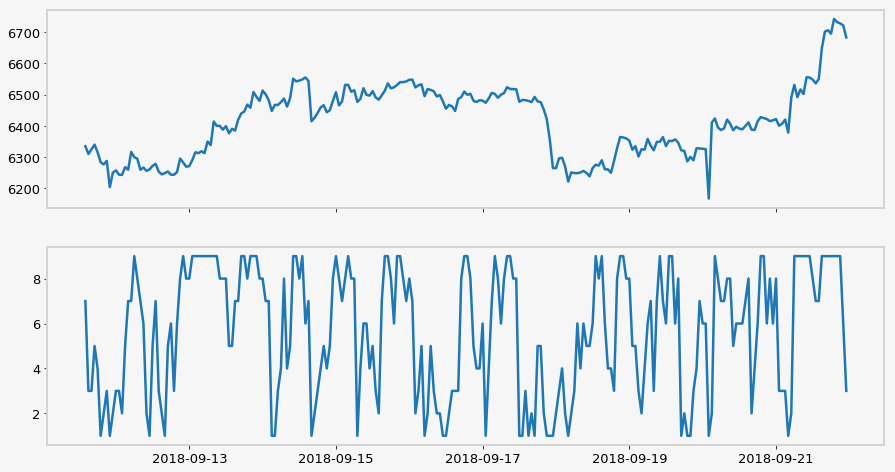

In [62]:
plot_chart(close, alpha4_plot)

在每个交易日，rank(low)就是对当前所有的股票的最低价排序，Ts_Rank(RankPct(low),9 表示过去9天，每天每只股票的最低价存在一个位置，因此调仓时，每只股票有过去9个rank位置，对这9个位置排序，今天的因子值为今天rank值在过去9天中的rank
进场信号：
long:如果出现，当alpha4等于9 的信号时，赋值2表示做多，下多单。
short:如果出现，当alpha4等于1 的信号时，赋值-2表示做空，下空单。
出场信号： 
close_long：判断当前市场是否出现新的信号可以开空单，那么就平掉原来的多仓，否则继续持有多仓。赋值为1，表示平多仓。
close_short：判断当前市场是否出现新的信号可以开多单，那么就平掉原来的空仓，否则继续持有空仓。赋值为-1，表示平空仓。

In [66]:
# 进场信号
long = dv.add_formula("long","If((alpha4_C==9),2,0)", add_data=True)
short = dv.add_formula("short","If((alpha4_C==1),-2,0)", add_data=True)

# 出场信号
close_long = dv.add_formula("closeLong","If(short==-2,1,0)", add_data=True)
close_short = dv.add_formula("closeShort","If(long==2,-1,0)", add_data=True)

In [67]:
dv.get_ts('long').stack()[dv.get_ts('long').stack()==2]#观察出现做多信号的时间点

trade_date      symbol         
20180601150000  BTCUSDT:binance    2.0
20180601160000  BTCUSDT:binance    2.0
20180602050000  BTCUSDT:binance    2.0
20180602060000  BTCUSDT:binance    2.0
20180602070000  BTCUSDT:binance    2.0
20180602150000  BTCUSDT:binance    2.0
20180602160000  BTCUSDT:binance    2.0
20180602180000  BTCUSDT:binance    2.0
20180603030000  BTCUSDT:binance    2.0
20180603140000  BTCUSDT:binance    2.0
20180603150000  BTCUSDT:binance    2.0
20180603170000  BTCUSDT:binance    2.0
20180604080000  BTCUSDT:binance    2.0
20180605050000  BTCUSDT:binance    2.0
20180606000000  BTCUSDT:binance    2.0
20180606010000  BTCUSDT:binance    2.0
20180606020000  BTCUSDT:binance    2.0
20180606140000  BTCUSDT:binance    2.0
20180606210000  BTCUSDT:binance    2.0
20180607060000  BTCUSDT:binance    2.0
20180607080000  BTCUSDT:binance    2.0
20180607090000  BTCUSDT:binance    2.0
20180607100000  BTCUSDT:binance    2.0
20180609010000  BTCUSDT:binance    2.0
20180609020000  BTCUSDT:binance 

In [68]:
#通过测试报告，看多空信号的绩效，这里是定义报告格式
from jaqs_fxdayu.research import TimingDigger

tdalpha4 = TimingDigger(output_folder=".", output_format='pdf',signal_name='alpha4')

def TimingSignal(td, dv, long='long', short='short',closeLong='closeLong', closeShort='closeShort'\
                 , mhp=None,sl=None,sp=None):
    # step 1：实例化TimingDigger 通过output_folder和output_format指定测试报告的输出路径和输出格式，通过signal_name指定绩效文件名称

    #多空信号分别计算一遍 输出汇总结果
    td.process_signal(
        enter_signal=dv.get_ts(long),
        exit_signal=dv.get_ts(closeLong),
        sig_type="long",  # 信号类型 long/short
        price=dv.get_ts('close'),
        max_holding_period=mhp,  # 最大持有天数 可为空
        stoploss=-sl,  # 止损百分比 负数 可为空
        stopprofit=sp,  # 止盈百分比 正数 可为空
    )

    td.process_signal(
        enter_signal=dv.get_ts(short),
        exit_signal=dv.get_ts(closeShort),
        sig_type="short",  # 信号类型 long/short
        price=dv.get_ts("close"),
        max_holding_period=mhp,  # 最大持有天数 可为空
        stoploss=-sl,  # 止损百分比 负数 可为空
        stopprofit=sp,  # 止盈百分比 正数 可为空
    )

In [69]:
TimingSignal(tdalpha4, dv, mhp=100, sl=0.05, sp=0.3)#调取数据

Nan Data Count (should be zero) : 0;  Percentage of effective data: 20%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 12%


In [70]:
tdalpha4.create_event_report(sig_type="long")

*****-Summary-*****
Event Analysis
                        win     loss      all
t-stat               11.182  -20.868   -3.259
p-value               0.000    0.000    0.001
mean                  0.015   -0.011   -0.003
std                   0.018    0.010    0.018
info_ratio            0.838   -1.080   -0.139
skewness              1.972   -2.004    1.297
kurtosis              3.807    4.627    5.233
pct5                  0.001   -0.031   -0.026
pct25                 0.003   -0.014   -0.010
pct50                 0.009   -0.008   -0.005
pct75                 0.021   -0.004    0.003
pct95                 0.050   -0.001    0.029
occurance           179.000  374.000  553.000
win_ratio               NaN      NaN    0.324
win_mean/loss_mean      NaN      NaN    1.384


In [71]:
tdalpha4.create_event_report(sig_type="short")

*****-Summary-*****
Event Analysis
                        win     loss      all
t-stat                9.843  -17.270    0.315
p-value               0.000    0.000    0.753
mean                  0.020   -0.011    0.000
std                   0.022    0.009    0.021
info_ratio            0.910   -1.227    0.018
skewness              1.245   -1.283    1.502
kurtosis              0.510    1.259    2.949
pct5                  0.001   -0.030   -0.027
pct25                 0.003   -0.015   -0.010
pct50                 0.009   -0.009   -0.003
pct75                 0.032   -0.004    0.005
pct95                 0.066   -0.001    0.044
occurance           118.000  199.000  317.000
win_ratio               NaN      NaN    0.372
win_mean/loss_mean      NaN      NaN    1.777


In [72]:
tdalpha4.create_event_report(sig_type="long_short") #同时计算多空头信号的绩效

*****-Summary-*****
Event Analysis
                        win     loss      all
t-stat               14.817  -26.923   -2.228
p-value               0.000    0.000    0.026
mean                  0.017   -0.011   -0.001
std                   0.020    0.010    0.019
info_ratio            0.861   -1.126   -0.076
skewness              1.635   -1.817    1.430
kurtosis              2.056    3.870    4.306
pct5                  0.001   -0.031   -0.027
pct25                 0.003   -0.014   -0.010
pct50                 0.009   -0.008   -0.004
pct75                 0.023   -0.004    0.003
pct95                 0.065   -0.001    0.036
occurance           297.000  573.000  870.000
win_ratio               NaN      NaN    0.341
win_mean/loss_mean      NaN      NaN    1.542


# 通用性测试

In [73]:
import warnings
warnings.filterwarnings('ignore')

from jaqs_fxdayu.data.dataservice import LocalDataService
ds = LocalDataService()
from time import time
## 加freq参数

start = time()
path = r'./min_data/VnTrader_1Min_Db'
props = {'fields': 'open,high,low,close,volume',
         'symbol': 'EOSUSDT:binance' ,
         'freq': '4H',
         'start_date':20180601000000}

Time_dict = ds.bar_reader(path,props) #读取数据
print(time()-start)

4.241812705993652


In [74]:
from jaqs_fxdayu.data.hf_dataview import HFDataView
dv4H = HFDataView()

In [75]:
dv4H.create_init_dv(Time_dict.set_index(["trade_date","symbol"]))

Initialize dataview success.


In [76]:
import matplotlib.pyplot as plt

def plot_chart(close,alpha):
    fig,(ax,ax1) = plt.subplots(2,1,sharex=True, figsize=(15,8))
    ax.plot(close.iloc[-250:])
    ax1.plot(alpha.iloc[-250:])
    # plt.savefig('good')
    plt.show()

In [77]:
def RankPct(df):
    return df.rank(axis=1, pct=True)

In [78]:
alpha4=dv4H.add_formula('alpha4_C','-1*Ts_Rank(RankPct(low),9)',add_data=True,register_funcs={'RankPct':RankPct})
alpha4_change=dv4H.add_formula('alpha4_C','Ts_Rank(low,9)',add_data=True,register_funcs={'RankPct':RankPct})

Field [alpha4_C] is overwritten.


In [79]:
# 进场信号
long = dv4H.add_formula("long","If((alpha4_C==9),2,0)", add_data=True)
short = dv4H.add_formula("short","If((alpha4_C==1),-2,0)", add_data=True)

# 出场信号
close_long = dv4H.add_formula("closeLong","If(short==-2,1,0)", add_data=True)
close_short = dv4H.add_formula("closeShort","If(long==2,-1,0)", add_data=True)

In [80]:
dv4H.get_ts('long').stack()[dv4H.get_ts('long').stack()==2]#观察出现做多信号的时间点

trade_date      symbol         
20180602120000  EOSUSDT:binance    2.0
20180602160000  EOSUSDT:binance    2.0
20180602200000  EOSUSDT:binance    2.0
20180603000000  EOSUSDT:binance    2.0
20180603080000  EOSUSDT:binance    2.0
20180603160000  EOSUSDT:binance    2.0
20180603200000  EOSUSDT:binance    2.0
20180606000000  EOSUSDT:binance    2.0
20180606040000  EOSUSDT:binance    2.0
20180606080000  EOSUSDT:binance    2.0
20180606200000  EOSUSDT:binance    2.0
20180608040000  EOSUSDT:binance    2.0
20180609120000  EOSUSDT:binance    2.0
20180609160000  EOSUSDT:binance    2.0
20180612120000  EOSUSDT:binance    2.0
20180614120000  EOSUSDT:binance    2.0
20180614160000  EOSUSDT:binance    2.0
20180615040000  EOSUSDT:binance    2.0
20180619040000  EOSUSDT:binance    2.0
20180619200000  EOSUSDT:binance    2.0
20180621120000  EOSUSDT:binance    2.0
20180625160000  EOSUSDT:binance    2.0
20180626000000  EOSUSDT:binance    2.0
20180626040000  EOSUSDT:binance    2.0
20180628040000  EOSUSDT:binance 

In [86]:
#通过测试报告，看多空信号的绩效，这里是定义报告格式
from jaqs_fxdayu.research import TimingDigger

tdalpha4_EOSUSDT = TimingDigger(output_folder=".", output_format='pdf',signal_name='alpha4_EOSUSDT')

def TimingSignal(td, dv4H, long='long', short='short',closeLong='closeLong', closeShort='closeShort'\
                 , mhp=None,sl=None,sp=None):
    # step 1：实例化TimingDigger 通过output_folder和output_format指定测试报告的输出路径和输出格式，通过signal_name指定绩效文件名称

    #多空信号分别计算一遍 输出汇总结果
    td.process_signal(
        enter_signal=dv4H.get_ts(long),
        exit_signal=dv4H.get_ts(closeLong),
        sig_type="long",  # 信号类型 long/short
        price=dv4H.get_ts('close'),
        max_holding_period=mhp,  # 最大持有天数 可为空
        stoploss=-sl,  # 止损百分比 负数 可为空
        stopprofit=sp,  # 止盈百分比 正数 可为空
    )

    td.process_signal(
        enter_signal=dv4H.get_ts(short),
        exit_signal=dv4H.get_ts(closeShort),
        sig_type="short",  # 信号类型 long/short
        price=dv4H.get_ts("close"),
        max_holding_period=mhp,  # 最大持有天数 可为空
        stoploss=-sl,  # 止损百分比 负数 可为空
        stopprofit=sp,  # 止盈百分比 正数 可为空
    )

In [87]:
TimingSignal(tdalpha4_EOSUSDT, dv4H, mhp=100, sl=0.05, sp=0.3)#调取数据

Nan Data Count (should be zero) : 0;  Percentage of effective data: 16%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 15%


In [88]:
tdalpha4_EOSUSDT.create_event_report(sig_type="long")

*****-Summary-*****
Event Analysis
                       win    loss      all
t-stat               6.954 -14.937   -0.342
p-value              0.000   0.000    0.733
mean                 0.084  -0.048   -0.003
std                  0.073   0.027    0.079
info_ratio           1.143  -1.773   -0.033
skewness             0.993  -0.081    1.426
kurtosis             0.722  -0.803    1.971
pct5                 0.003  -0.094   -0.083
pct25                0.024  -0.067   -0.058
pct50                0.070  -0.054   -0.022
pct75                0.119  -0.024    0.024
pct95                0.205  -0.008    0.163
occurance           38.000  72.000  110.000
win_ratio              NaN     NaN    0.345
win_mean/loss_mean     NaN     NaN    1.739


In [89]:
tdalpha4_EOSUSDT.create_event_report(sig_type="short")

*****-Summary-*****
Event Analysis
                       win    loss      all
t-stat               7.520 -10.024    1.414
p-value              0.000   0.000    0.160
mean                 0.071  -0.044    0.011
std                  0.064   0.031    0.076
info_ratio           1.097  -1.390    0.141
skewness             1.431  -0.406    1.067
kurtosis             2.144  -0.524    1.571
pct5                 0.007  -0.089   -0.078
pct25                0.019  -0.068   -0.049
pct50                0.056  -0.046   -0.001
pct75                0.097  -0.013    0.045
pct95                0.194  -0.001    0.143
occurance           48.000  53.000  101.000
win_ratio              NaN     NaN    0.475
win_mean/loss_mean     NaN     NaN    1.622


In [90]:
tdalpha4_EOSUSDT.create_event_report(sig_type="long_short") #同时计算多空头信号的绩效

*****-Summary-*****
Event Analysis
                       win     loss      all
t-stat              10.247  -17.685    0.702
p-value              0.000    0.000    0.484
mean                 0.077   -0.046    0.004
std                  0.069    0.029    0.078
info_ratio           1.111   -1.588    0.048
skewness             1.223   -0.219    1.242
kurtosis             1.387   -0.657    1.692
pct5                 0.004   -0.093   -0.083
pct25                0.023   -0.068   -0.055
pct50                0.059   -0.053   -0.012
pct75                0.118   -0.021    0.037
pct95                0.209   -0.004    0.156
occurance           86.000  125.000  211.000
win_ratio              NaN      NaN    0.408
win_mean/loss_mean     NaN      NaN    1.654
